In [1]:
from voltdbclient import *

In [2]:
client = FastSerializer("localhost", 21212)

In [3]:
proc = VoltProcedure( client, "CountHADS")
response = proc.call()

In [4]:
for x in response.tables:
    print x

column count: 1
row count: 1
cols: (C1: 6)
rows -
[64535]


In [5]:
proc1 = VoltProcedure( client, "GetHADSAge", [FastSerializer.VOLTTYPE_INTEGER])
#input parameter to stored procedure age=50
#The return values are FMR (Fair mkt value rent) and ABL30 low income adjusted for #of bedrooms
response1 = proc1.call( [50] )

In [6]:
for x in response1.tables:
    print x

column count: 2
row count: 1348
cols: (FMR: 5), (ABL30: 8)
rows -
[1100, 19911.4]
[988, 19235.377778]
[949, 17879.911111]
[1158, 20735.0]
[1233, 25288.0]
[1129, 23113.125]
[971, 19760.0]
[956, 20217.375]
[873, 15808.0]
[1760, 24783.407407]
[1528, 21547.0]
[804, 15525.0]
[2367, 40675.555556]
[1577, 19908.571429]
[1282, 19347.9]
[646, 16706.25]
[907, 16471.0]
[978, 17382.857143]
[1004, 19068.4]
[760, 16501.5]
[1528, 21576.0]
[1091, 22346.628571]
[711, 17100.0]
[1102, 18949.84]
[683, 14261.142857]
[1234, 17902.857143]
[1034, 18238.1]
[1193, 21591.7]
[1474, 23776.0]
[1294, 21220.714286]
[1094, 20263.657143]
[944, 19973.571429]
[1081, 21617.142857]
[1282, 19347.9]
[1436, 25648.888889]
[1763, 21320.0]
[949, 17851.6]
[1231, 23010.0]
[1436, 25685.714286]
[819, 17497.125]
[1094, 20206.16]
[1496, 27582.222222]
[1094, 20239.555556]
[1094, 20239.555556]
[1259, 24717.241379]
[717, 15500.0]
[1496, 27550.0]
[1093, 22200.0]
[1421, 22400.0]
[1082, 20089.285714]
[1394, 24700.0]
[1282, 19349.777778]
[966

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

In [9]:
table = response1.tables[0]
for row in table.tuples:
    d = row[0]
    e = row[1]
    print d, e

1100 19911.4
988 19235.377778
949 17879.911111
1158 20735.0
1233 25288.0
1129 23113.125
971 19760.0
956 20217.375
873 15808.0
1760 24783.407407
1528 21547.0
804 15525.0
2367 40675.555556
1577 19908.571429
1282 19347.9
646 16706.25
907 16471.0
978 17382.857143
1004 19068.4
760 16501.5
1528 21576.0
1091 22346.628571
711 17100.0
1102 18949.84
683 14261.142857
1234 17902.857143
1034 18238.1
1193 21591.7
1474 23776.0
1294 21220.714286
1094 20263.657143
944 19973.571429
1081 21617.142857
1282 19347.9
1436 25648.888889
1763 21320.0
949 17851.6
1231 23010.0
1436 25685.714286
819 17497.125
1094 20206.16
1496 27582.222222
1094 20239.555556
1094 20239.555556
1259 24717.241379
717 15500.0
1496 27550.0
1093 22200.0
1421 22400.0
1082 20089.285714
1394 24700.0
1282 19349.777778
966 19928.571429
1588 29386.666667
1496 27550.0
1445 25777.52
1243 23110.88
971 20037.857143
1474 23175.0
2058 33029.62963
1202 24075.0
1094 20263.657143
1474 23175.0
2525 31900.0
1416 28288.0
1231 23014.814815
2009 25220.0
21

In [10]:
d = []
table = response1.tables[0]
for row in table.tuples:
    d.append({"A":row[0],"B":row[1]})

df = pd.DataFrame(d)

In [11]:
print df.shape

(1348, 2)


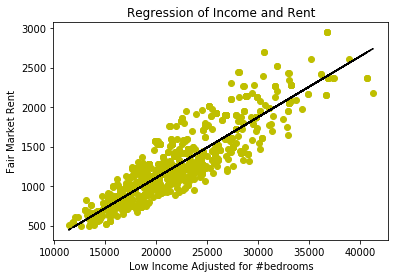

In [14]:
from pylab import * 
x = df['B'] 
y = df['A'] 
m,b = polyfit(x, y, 1) 
plot(x, y, 'yo', x, m*x+b, '--k') 
title('Regression of Income and Rent') ;
xlabel('Low Income Adjusted for #bedrooms')
ylabel('Fair Market Rent')
show() 
savefig('finalProj.png', fmt='png', dpi=100)